# Life Expectancy & GDP

This is Nejc's portfolio project called Life Expectancy and GDP, which is a part of the Data Scientist: Analytics Specialist career pathway on the platform known as Codecademy, which focuses primarly on teaching people how to code in different programming languages, as well as become more data literate.

In this project, we are going to focus on reading data stored in a csv file called all_data and visualizing it in different ways, which will enable us to come to final conclusions about the correlation between life expectancy and gross domestic produce or GDP.

## Project Objectives

Objectives of this project is to get to know
+ which countries are in the dataset (all_data.csv)?
+ what is the average life expectancy across all the countries in the dataset?
+ does the volume of GDP correlate with life expectancy?
+ is the gross domestic produce increasing over captured time?
+ is the life expectancy increasing over the captured time?

### Python Modules & Loading Data

In [175]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv("all_data.csv")
print(df.head())
print(len(df))

df.rename(columns = {'Life expectancy at birth (years)': 'life_expect'}, inplace = True)
# print(df.life_expect)
df['Country'] = df['Country'].str.replace('United States of America','USA')

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
96


### Exploring the Data

What are the **different countries** in the dataset?

In [176]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


In what **time frame** has the data been collected?

In [177]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


What are the **lowest, average and largest Gross Domestic Produce (GDP) values** in the dataset, across all the years and the different countries?

In [178]:
min_gdp = df.GDP.min()
average_gdp = df.GDP.mean()
max_gdp = df.GDP.max()
median_gdp = df.GDP.median()

print("The lowest GDP in the dataset is: " +str(min_gdp))
print("Average GDP of all the countries in different years is: " +str(average_gdp))
print("The highest recorded GDP value in the data set is: " +str(max_gdp))
print("Median value of all the GDP values is: " +str(median_gdp))

The lowest GDP in the dataset is: 4415702800.0
Average GDP of all the countries in different years is: 3880498570768.396
The highest recorded GDP value in the data set is: 18100000000000.0
Median value of all the GDP values is: 1280220000000.0


What's the **minimum, average, maximum recorded Life Expectancy**, across all the years and different countries in the dataset?

In [179]:
min_life_expect = df.life_expect.min()
avg_life_expect = df.life_expect.mean()
formated_avg_le = "{:.2f}".format(avg_life_expect)
max_life_expect = df.life_expect.max()
median_life_expect = df.life_expect.median()

print("The lowest recorded life expectancy in the dataset is " +str(min_life_expect) +" years of age.")
print("Average life expectancy in the dataset is " +str(formated_avg_le) +" years of age.")
print("Highest recorded life expectancy value is " +str(max_life_expect) +" years of age.")

The lowest recorded life expectancy in the dataset is 44.3 years of age.
Average life expectancy in the dataset is 72.79 years of age.
Highest recorded life expectancy value is 81.0 years of age.


Does the **value of country's GDP correlate with the life expectancy** of its citizens?

In [180]:
for i in df.Country.unique(): 
    correlation, p = pearsonr(df.life_expect[df["Country"] == i], df.GDP[df["Country"] == i])
    print("Correlation for " + i +" is:" , round(correlation, 2))

Correlation for Chile is: 0.95
Correlation for China is: 0.91
Correlation for Germany is: 0.93
Correlation for Mexico is: 0.93
Correlation for USA is: 0.98
Correlation for Zimbabwe is: 0.97


From the values displayed above, it can be seen that the value of country's gross domestic produce (GDP) does correlate highly with the life expectancy of its citizen, however, as we are going to be able to see in the graph down bellow, those values are not great indicators, since there can be seen a non-linear relationships in the graph.

### Data Visualization

Visualization of **GDP values by countries**.

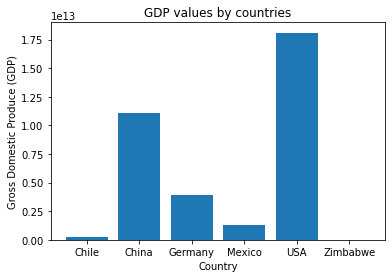

In [181]:
plt.bar(df.Country, df.GDP)
plt.title("GDP values by countries")
plt.xlabel("Country")
plt.ylabel("Gross Domestic Produce (GDP)")
plt.show();

Visualization of **GDP values over Time**

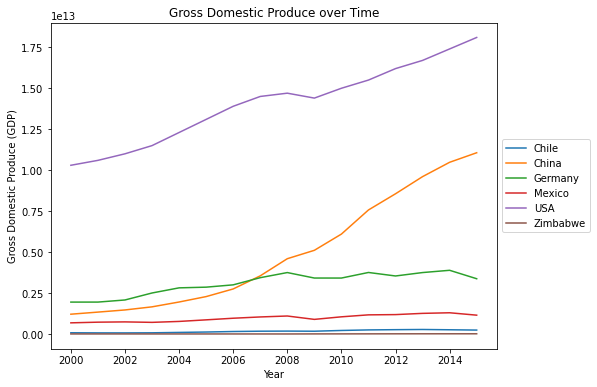

In [182]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Gross Domestic Produce over Time")
plt.ylabel("Gross Domestic Produce (GDP)");

Visualization of **Life expectancies by GDP**

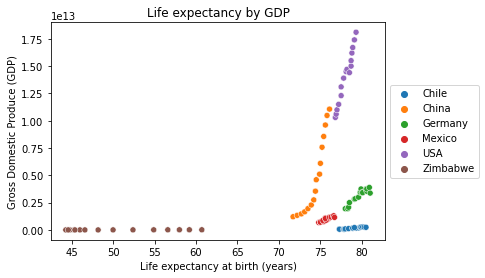

In [183]:
sns.scatterplot(x=df.life_expect, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Life expectancy by GDP")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("Gross Domestic Produce (GDP)");

Visualization of **Life expectancy by countries**

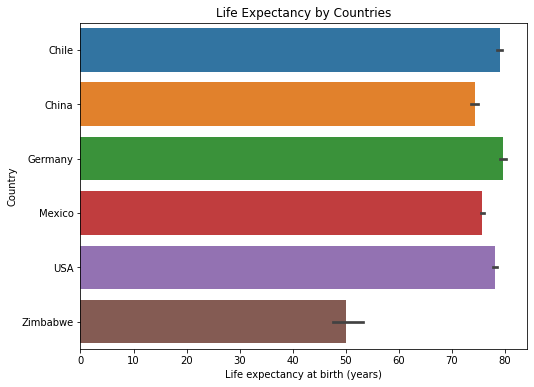

In [184]:
plt.figure(figsize=(8,6))
sns.barplot(x= df.life_expect, y= df.Country, data=df)
plt.title("Life Expectancy by Countries")
plt.xlabel("Life expectancy at birth (years)");

Distribution of **life expectancy values by count**

<Figure size 1152x864 with 0 Axes>

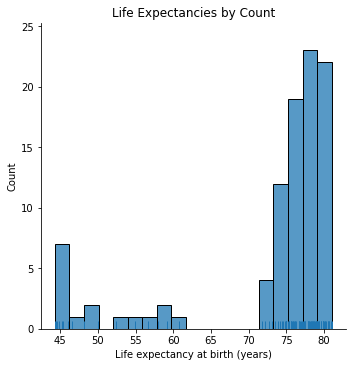

In [185]:
plt.figure(figsize=(16,12))
sns.displot(df.life_expect, rug = True, kde=False)
plt.title("Life Expectancies by Count")
plt.xlabel("Life expectancy at birth (years)");
plt.show();

Distribution of **Life expectancy values by countries**

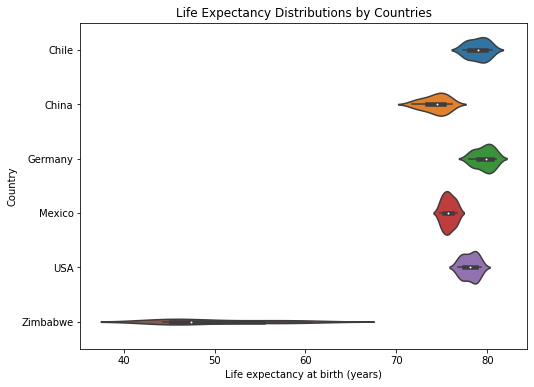

In [186]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df.life_expect, x=df.life_expect, y=df.Country)
plt.title("Life Expectancy Distributions by Countries")
plt.xlabel("Life expectancy at birth (years)")
plt.show();

Visualization of **Life expectancy over Time**

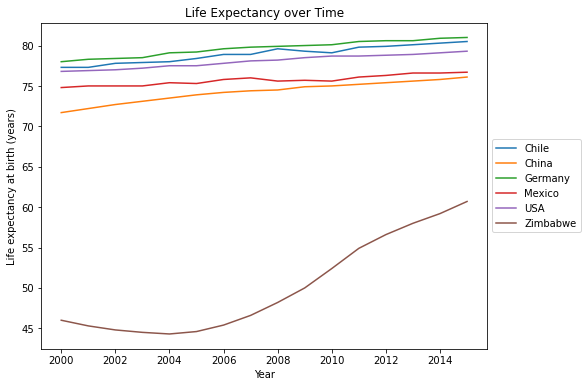

In [187]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.life_expect, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Life Expectancy over Time")
plt.ylabel("Life expectancy at birth (years)");

### Conclusions

With the exploration of the aquired data and different visualizations techniques, we are now able to answer this project's objectives, which are stated in the beginning of this document.

**1. Which countries are in the dataset (all_data.csv)?**
Regarding the countries, we were able to identify 6 countries in the dataset and those are Chile, China, Germany, Mexico, United States of America and Zimbabwe.

**2. What is the average life expectancy across all the countries in the dataset?**
For the average life expectancy among the above listed countries, we were able to identify the value of 72.79 years, with the shortest life expectancy value of 44.3 years, and the longest life expectancy value of 81.0 years of age.

**3. Does the volume of GDP correlate with life expectancy?**
Yes, according to the findings, the volume of gross domestic produce (GDP) positively correlates with the life expectancy of the citizens.

**4. Are the gross domestic produce (GDP) and life expectancy values increasing over captured time?**
Yes, both the gross domestic produce (GDP) and life expectancy values are increasing over time. Most gain in GDP over captured time was recorded in China, while the life expectancy mostly increased in Zimbabwe, and went from just above 45 to 60 in 15 years.
